In [0]:
import os
!pip install -q torch torchvision feather-format kornia pyarrow Pillow wandb nbdev fastprogress --upgrade 
!pip install -q git+https://github.com/fastai/fastcore  --upgrade
!pip install -q git+https://github.com/fastai/fastai2 --upgrade
os._exit(00)

     |████████████████████████████████| 122kB 4.9MB/s 
     |████████████████████████████████| 59.2MB 48kB/s 
     |████████████████████████████████| 2.1MB 56.0MB/s 
     |████████████████████████████████| 1.4MB 68.9MB/s 
     |████████████████████████████████| 256kB 60.5MB/s 
     |████████████████████████████████| 92kB 15.4MB/s 
     |████████████████████████████████| 92kB 14.4MB/s 
     |████████████████████████████████| 460kB 44.8MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |████████████████████████████████| 184kB 60.9MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

In [2]:
!gdown "https://drive.google.com/uc?id=1ffJr3NrYPqzutcXsYIVNLXzzUaC9RqYM"

Downloading...
From: https://drive.google.com/uc?id=1ffJr3NrYPqzutcXsYIVNLXzzUaC9RqYM
To: /content/cat-dataset.zip
4.33GB [01:16, 56.4MB/s]


In [0]:
import zipfile
with zipfile.ZipFile('cat-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [0]:
for i in range(7):
  path = Path(f'CAT_0{i}')
  shutil.rmtree(path)

In [0]:
for i in range(7):
  paths = Path(f'cats/CAT_0{i}').ls()
  for path in paths:
    p = Path(path).absolute()
    par = p.parents[1]
    p.rename(par/p.name)

In [0]:
def get_ip(img:PILImage, pts:array): return TensorPoint(pts, sz=img.size)

In [0]:
def get_points(coords:array):
  coords = np.delete(coords, 0)
  points = []
  temp = []
  for cord in coords:
    temp.append(cord)
    if len(temp) == 2:
      points.append(temp)
      temp = []
  return tensor(points)

In [0]:
def img2txt_name(f): 
  return path/f'{str(f)}.cat'

In [0]:
def get_y(f:Path):
  pts = np.genfromtxt(img2txt_name(f))
  return get_points(pts)

In [0]:
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_y)

In [0]:
bs=48

In [0]:
path = Path('')

In [0]:
dbunch = dblock.databunch(path, path=path, item_tfms=Resize(224), bs=bs,
                batch_tfms=[Normalize.from_stats(*imagenet_stats)])

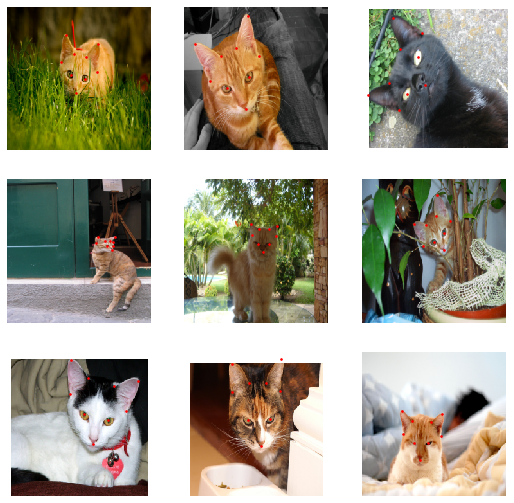

In [10]:
dbunch.show_batch()

In [0]:
def myLoss(out, pts):
  CELF = CrossEntropyLossFlat()
  loss = 0
  pt = out
  for p in range(len(pt)):
    pred = pt[p].view(-1, 2)
    loss += F.mse_loss(pred, pts[p])
  return loss

In [0]:
dbunch.c = 18

In [0]:
net = xresnet18(sa=True, act_cls=MishJit, c_out=18)

In [0]:
learn = Learner(dbunch, net, loss_func=myLoss, opt_func=ranger)

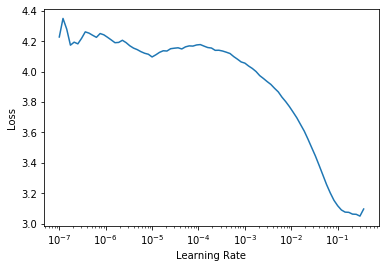

In [74]:
learn.lr_find()

In [24]:
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,time
0,4.187934,6.892743,01:45
1,3.757004,5.378064,01:45
2,3.121641,3.948527,01:45
3,2.126964,5.164824,01:45
4,1.306560,1.882596,01:45


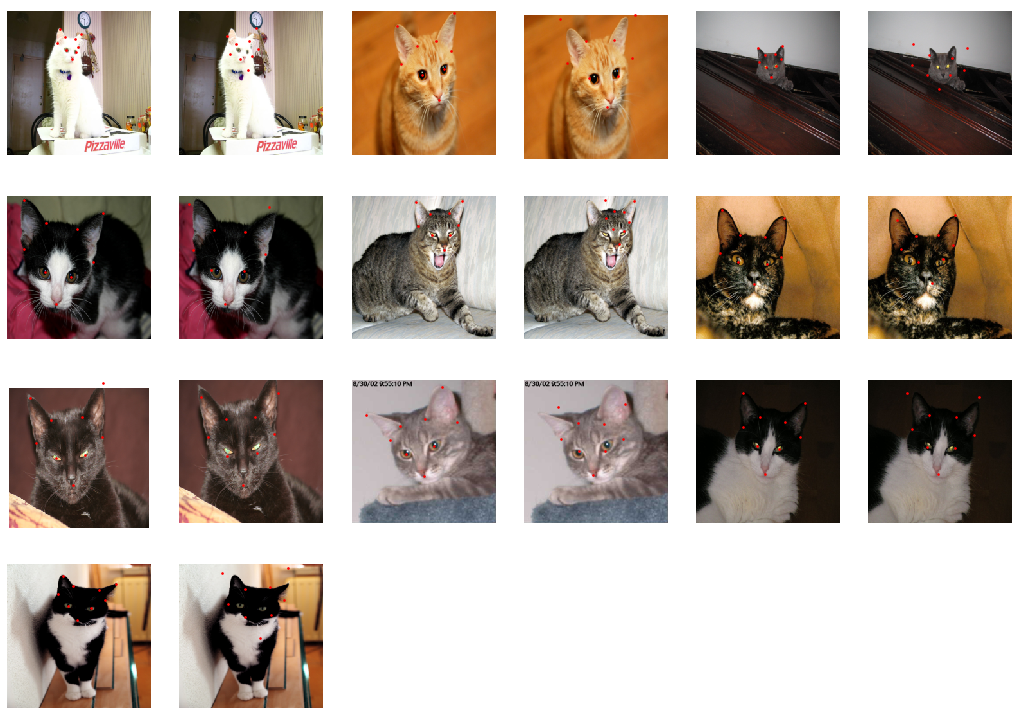

In [25]:
learn.show_results()

In [0]:
learn.save('stage_1')

In [28]:
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,time
0,1.310372,1.631431,01:46
1,0.943775,2.085901,01:46
2,0.699530,1.116776,01:46
3,0.562104,0.838216,01:46
4,0.322708,0.665821,01:46


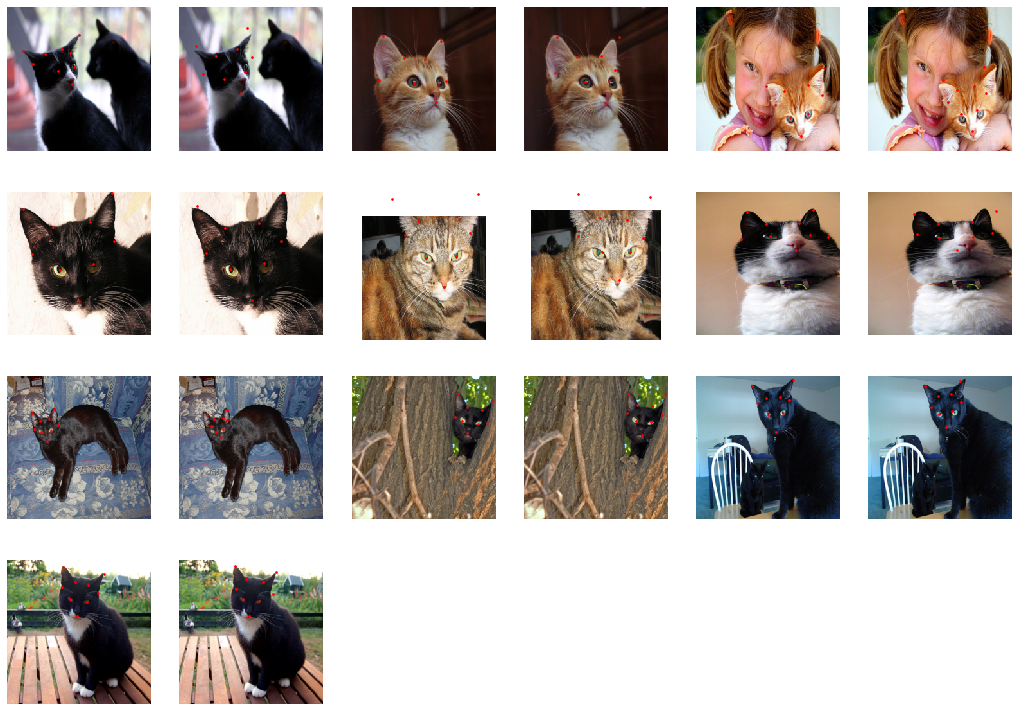

In [29]:
learn.show_results()

In [0]:
learn.save('r_18')

# Resnet34

In [0]:
net = xresnet34(sa=True, act_cls=MishJit, c_out=18)

In [0]:
learn = Learner(dbunch, net, loss_func=myLoss, opt_func=ranger)

In [35]:
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,time
0,3.963884,6.105001,01:49
1,3.791653,5.488525,01:48
2,3.451807,4.634100,01:48
3,2.149595,3.196682,01:49
4,1.305409,1.791301,01:49


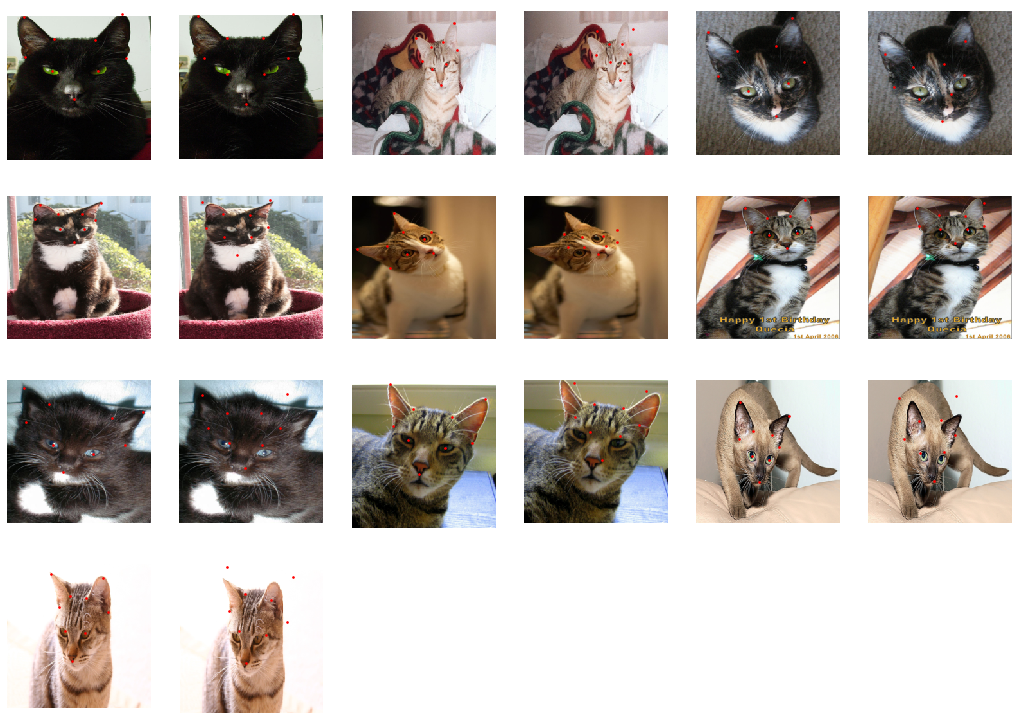

In [36]:
learn.show_results()

In [37]:
learn.fit_flat_cos(5, 1e-2)

epoch,train_loss,valid_loss,time
0,1.251544,1.568763,01:50
1,0.866186,1.505261,01:50
2,0.652687,1.248133,01:49
3,0.558491,0.840027,01:49
4,0.297979,0.634681,01:48


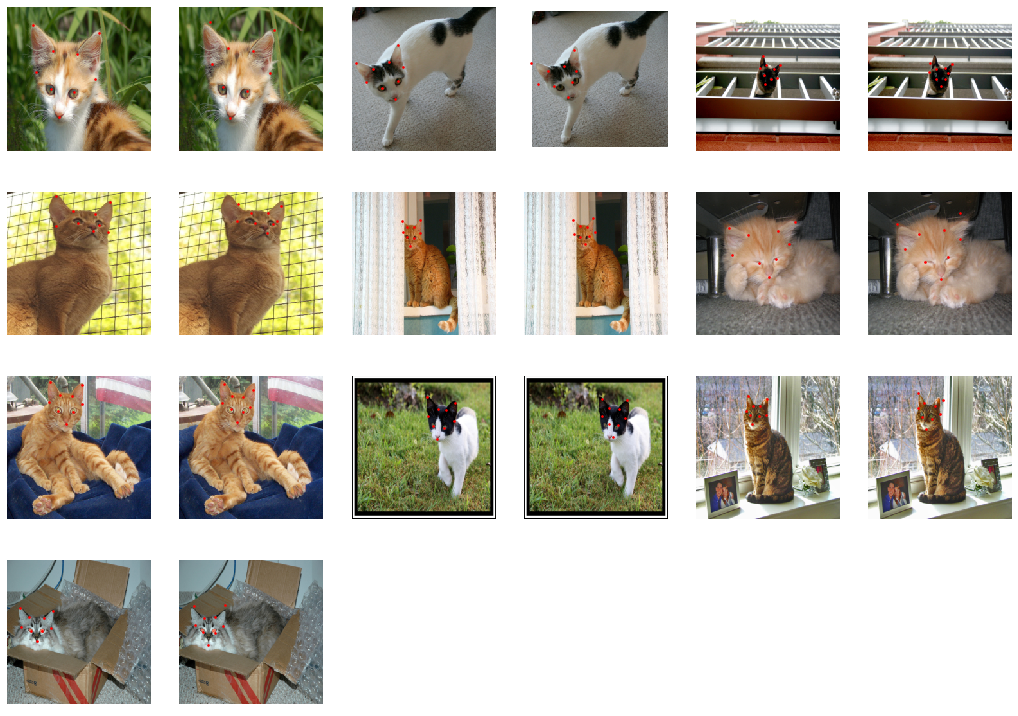

In [38]:
learn.show_results()

In [0]:
learn.save('r_34')